# MNIST Digit Classification with Neural Networks

This notebook demonstrates classification of handwritten digits (MNIST dataset) using a fully connected neural network.  

**Dataset**: 28x28 grayscale images, 10 classes (digits 0-9).  

**Goals**:  
- Explore the dataset  
- Build and train a dense neural network  
- Analyze the effects of hyperparameters (batch size, learning rate, dropout)  
- Evaluate model performance on the test set


In [60]:

import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Inspecting shapes of data and visualizing some data samples

In [61]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


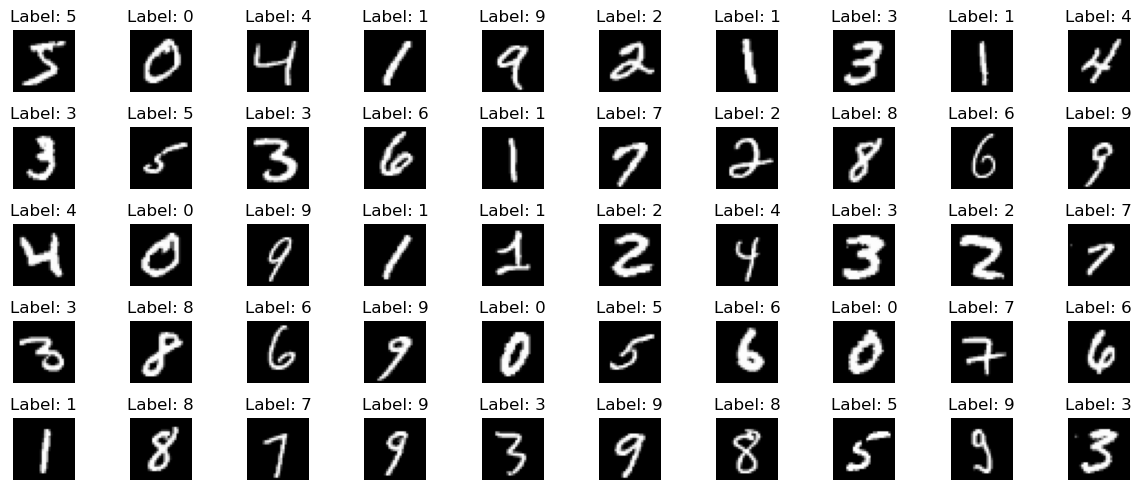

In [62]:
rows, cols = 5, 10 #generate first 5 rows and 10 columns of training dataset
fig, axes = plt.subplots(rows, cols, figsize=(12,5)) #set figsize for spacing
axes = axes.flatten() #flatten axes for enumeration

for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap = 'gray') #generate subplot for training image
    ax.set_title(f"Label: {y_train[i]}") #label subplot with label
    ax.axis('off') #no axis needed

plt.tight_layout() #prevent overlapping
plt.show()


In [63]:
#normalize the images for convergence
X_train = X_train/255.0
X_test = X_test/255.0

#flatten the images for dense layers (need 1d vector)
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical #required to expand label into one-hot vectors

In [65]:
#Building the model

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (784,)), #input shape only needed for first layer
    Dense(64, activation = 'relu'), 
    Dense(10, activation = 'softmax'),  #softmax needed for multiclassification over sigmoid
])

In [66]:
model.compile(
    optimizer = 'adam', #adam optimizer over SGD, adam has higher learning rate making it better for small datasets
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [67]:
model.fit(X_train, to_categorical(y_train), epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9210 - loss: 0.2738
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9627 - loss: 0.1227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9730 - loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9782 - loss: 0.0707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9819 - loss: 0.0596


Based on the 5 epochs, we have a 98% training accuracy. 

Now, test if the model is overfitting to training set by using test data

In [68]:
model.evaluate(
    X_test,
    to_categorical(y_test)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9710 - loss: 0.0916


[0.09157999604940414, 0.9710000157356262]

The model has a 97% accuracy on test data, which is good. Now I will save the model and load it for further tuning

In [69]:
model.save_weights('model.weights.h5')

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#build model again
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (784,)),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax'), 
])

#load weights
model.load_weights("model.weights.h5")

In [71]:
predictions = model.predict(X_train[:5])

print(np.argmax(predictions, axis = 1))

print(y_train[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[5 0 4 1 9]
[5 0 4 1 9]


we can see that our predictions are correct for the first 5 rows with 0-indexing. 

## Hyperparameter Tuning

In [72]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [73]:
model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=10,
    batch_size = 64,
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9636 - loss: 0.1159
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.0919
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9754 - loss: 0.0808
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9786 - loss: 0.0690
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9793 - loss: 0.0688
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9810 - loss: 0.0621
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9827 - loss: 0.0560
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9830 - loss: 0.0559
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9848 - loss: 0.0509
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9850 - loss: 0.0513


Now, I am training the model with a specified learning rate for the Adam optimizer (default is 0.001, I am using 0.005) and 5--> 10 epochs, batchsize 32 --> 64

In [74]:
model.evaluate(
    X_test,
    to_categorical(y_test)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9731 - loss: 0.1214


[0.12142514437437057, 0.9731000065803528]

I believe that increasing the epochs and batch size has led to overfitting. To reduce this, I will add dropout (L2) regularization.  

In [75]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.5),  Dense(64, activation='relu'),
  Dropout(0.5),  Dense(10, activation='softmax'),
])

In [76]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [77]:
model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=10,
    batch_size = 64,
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7794 - loss: 0.7058
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8449 - loss: 0.5224
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8584 - loss: 0.4868
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8656 - loss: 0.4718
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8696 - loss: 0.4519
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8741 - loss: 0.4346
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8742 - loss: 0.4369
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss: 0.4369
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8754 - loss: 0.4331
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8810 - loss: 0.4162


In [78]:
model.evaluate(
    X_test,
    to_categorical(y_test)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.9466 - loss: 0.1938


[0.19383805990219116, 0.9466000199317932]

Test accuracy is much better with regularization, but still not as good as the original model. Perhaps lowering the dropout rate for each layer will allow the model to learn more.

In [79]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.4),  Dense(64, activation='relu'),
  Dropout(0.4),  Dense(10, activation='softmax'),
])

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=10,
    batch_size = 64,
)

model.evaluate(
    X_test,
    to_categorical(y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8320 - loss: 0.5513
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8898 - loss: 0.3810
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8978 - loss: 0.3472
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9039 - loss: 0.3341
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9060 - loss: 0.3242
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9105 - loss: 0.3089
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9099 - loss: 0.3105
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9146 - loss: 0.2978
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9154 - loss: 0.2951
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9159 - loss: 0.2944
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.9584 - loss: 0.1524


[0.15241274237632751, 0.9584000110626221]

In [80]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.3),  Dense(64, activation='relu'),
  Dropout(0.3),  Dense(10, activation='softmax'),
])

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=10,
    batch_size = 64,
)

model.evaluate(
    X_test,
    to_categorical(y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8660 - loss: 0.4431
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9131 - loss: 0.2987
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9203 - loss: 0.2740
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9255 - loss: 0.2556
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9291 - loss: 0.2455
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9310 - loss: 0.2389
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9337 - loss: 0.2283
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9359 - loss: 0.2236
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9373 - loss: 0.2193
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9356 - loss: 0.2202
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9622 - loss: 0.1334


[0.13341693580150604, 0.9621999859809875]

The model is getting closer, but still not at the 97% accuracy obtained using 3 dense layers and the default learning rate. To see if we are overfitting during epochs, I will use a validation set and measure validation loss

In [81]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.3),  Dense(64, activation='relu'),
  Dropout(0.3),  Dense(10, activation='softmax'),
])

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.005),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=10,
    batch_size = 64,
    validation_split=0.2
)

model.evaluate(
    X_test,
    to_categorical(y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.4234 - val_accuracy: 0.9452 - val_loss: 0.1891
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9211 - loss: 0.2753 - val_accuracy: 0.9528 - val_loss: 0.1612
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9265 - loss: 0.2529 - val_accuracy: 0.9555 - val_loss: 0.1436
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9304 - loss: 0.2349 - val_accuracy: 0.9587 - val_loss: 0.1421
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9342 - loss: 0.2265 - val_accuracy: 0.9629 - val_loss: 0.1270
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9390 - loss: 0.2151 - val_accuracy: 0.9603 - val_loss: 0.1405
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.2143 - val_accuracy: 0.9607 - val_loss: 0.1377
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9408 - loss: 0.2032 - val_accuracy: 0.

[0.12624619901180267, 0.9656000137329102]

Based on the validation loss, it should be okay to stop at around 7 epochs (loss jumps back after and oscillates slightly) 

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.3),  Dense(64, activation='relu'),
  Dropout(0.3),  Dense(10, activation='softmax'),
])

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.003),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=7,
    batch_size = 60,
    validation_split=0.2,
)

model.evaluate(
    X_test,
    to_categorical(y_test)
)

Epoch 1/7


/usr/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8658 - loss: 0.4366 - val_accuracy: 0.9487 - val_loss: 0.1699
Epoch 2/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9225 - loss: 0.2639 - val_accuracy: 0.9562 - val_loss: 0.1433
Epoch 3/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9313 - loss: 0.2326 - val_accuracy: 0.9634 - val_loss: 0.1255
Epoch 4/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9383 - loss: 0.2103 - val_accuracy: 0.9644 - val_loss: 0.1243
Epoch 5/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9411 - loss: 0.2023 - val_accuracy: 0.9644 - val_loss: 0.1206
Epoch 6/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9435 - loss: 0.1937 - val_accuracy: 0.9652 - val_loss: 0.1155
Epoch 7/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9457 - loss: 0.1820 - val_accuracy: 0.9678 - val_loss: 0.1083
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.9678 - loss: 0.1083


[0.10827624797821045, 0.9678000211715698]

After lowering the learning rate to 0.003 and batch size to 60 to match, the model accuracy is approaching 97%. I am curious about the relationship between learning rate, batch size, and accuracy, so I will plot it using a function.

In [83]:
def create_model(lr):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dropout(0.3),  Dense(64, activation='relu'),
        Dropout(0.3),  Dense(10, activation='softmax'),
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [84]:
learning_rates = [0.001, 0.003, 0.005, 0.007]
batch_sizes = [32, 64, 128, 256]

results = {}
for lr in learning_rates:
    accs = []
    for bs in batch_sizes:
        print(f"Training with lr={lr}, batch_size = {bs}")
        model = create_model(lr)
        history = model.fit(X_train, to_categorical(y_train), epochs = 7, batch_size = bs, verbose = 0, validation_split = 0.2)
        val_acc = history.history['val_accuracy'][-1]
        accs.append(val_acc)
    results[lr]= accs

Training with lr=0.001, batch_size = 32


/usr/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with lr=0.001, batch_size = 64
Training with lr=0.001, batch_size = 128
Training with lr=0.001, batch_size = 256
Training with lr=0.003, batch_size = 32
Training with lr=0.003, batch_size = 64
Training with lr=0.003, batch_size = 128
Training with lr=0.003, batch_size = 256
Training with lr=0.005, batch_size = 32
Training with lr=0.005, batch_size = 64
Training with lr=0.005, batch_size = 128
Training with lr=0.005, batch_size = 256
Training with lr=0.007, batch_size = 32
Training with lr=0.007, batch_size = 64
Training with lr=0.007, batch_size = 128
Training with lr=0.007, batch_size = 256


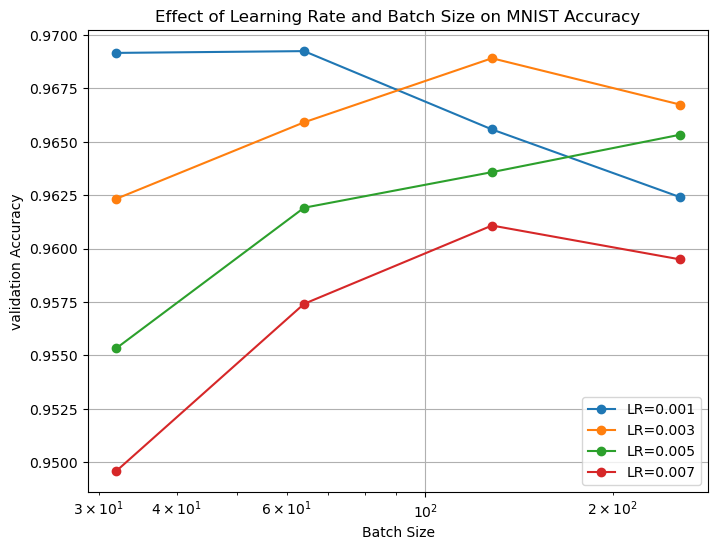

In [85]:
plt.figure(figsize = (8,6))
for lr, accs in results.items():
    plt.plot(batch_sizes, accs,marker = 'o', label = f"LR={lr}")
plt.xscale('log') #log scale batch size since it is doubling
plt.xlabel('Batch Size')
plt.ylabel("validation Accuracy")
plt.title("Effect of Learning Rate and Batch Size on MNIST Accuracy")
plt.legend()
plt.grid(True)
plt.show()

It seems that learning rates between 0.001 and 0.003 perform better than higher learning rates, regardless of batch size. Additionally, a batch size between 64 and 128 work best.

In [91]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.1),  Dense(64, activation='relu'),
  Dropout(0.1),  Dense(10, activation='softmax'),
])

from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate = 0.003),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=7,
    batch_size = 128,
    validation_data=(X_test, to_categorical(y_test))
)

model.evaluate(
    X_test,
    to_categorical(y_test)
)

Epoch 1/7


/usr/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.3373 - val_accuracy: 0.9565 - val_loss: 0.1417
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1676 - val_accuracy: 0.9670 - val_loss: 0.1099
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1316 - val_accuracy: 0.9709 - val_loss: 0.0950
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1135 - val_accuracy: 0.9726 - val_loss: 0.0912
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.0996 - val_accuracy: 0.9705 - val_loss: 0.0975
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0946 - val_accuracy: 0.9710 - val_loss: 0.1033
Epoch 7/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0871 - val_accuracy: 0.9737 - val_loss: 0.0886
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.9737 - loss: 0.0886


[0.08864858001470566, 0.9736999869346619]

It seems as if the crucial component was the dropout rate. The MNIST dataset may be too simple to require a lot of regularization. Thus, the model was underfitting due to the high dropout rate. 

In [92]:
def create_model(lr):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dropout(0.1),  Dense(64, activation='relu'),
        Dropout(0.1),  Dense(10, activation='softmax'),
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [93]:
learning_rates = [0.001, 0.002, 0.003]
batch_sizes = [32, 64, 128]

results = {}
for lr in learning_rates:
    accs = []
    for bs in batch_sizes:
        print(f"Training with lr={lr}, batch_size = {bs}")
        model = create_model(lr)
        history = model.fit(X_train, to_categorical(y_train), epochs = 7, batch_size = bs, verbose = 0, validation_split = 0.2)
        val_acc = history.history['val_accuracy'][-1]
        accs.append(val_acc)
    results[lr]= accs

Training with lr=0.001, batch_size = 32


/usr/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with lr=0.001, batch_size = 64
Training with lr=0.001, batch_size = 128
Training with lr=0.002, batch_size = 32
Training with lr=0.002, batch_size = 64
Training with lr=0.002, batch_size = 128
Training with lr=0.003, batch_size = 32
Training with lr=0.003, batch_size = 64
Training with lr=0.003, batch_size = 128


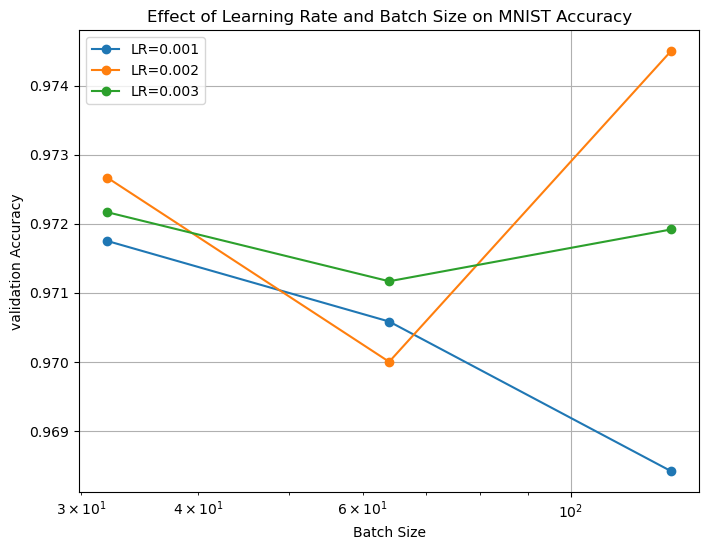

In [94]:
plt.figure(figsize = (8,6))
for lr, accs in results.items():
    plt.plot(batch_sizes, accs,marker = 'o', label = f"LR={lr}")
plt.xscale('log') #log scale batch size since it is doubling
plt.xlabel('Batch Size')
plt.ylabel("validation Accuracy")
plt.title("Effect of Learning Rate and Batch Size on MNIST Accuracy")
plt.legend()
plt.grid(True)
plt.show()

From the graph, the best performing model has 128 layers and a learning rate of 0.002. Lets construct this model and call it best_model

In [97]:
from tensorflow.keras.layers import Dense, Dropout
best_model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.1),  Dense(64, activation='relu'),
  Dropout(0.1),  Dense(10, activation='softmax'),
])

from tensorflow.keras.optimizers import Adam

best_model.compile(
    optimizer = Adam(learning_rate = 0.002),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

best_model.fit(
    X_train, 
    to_categorical(y_train),
    epochs=7,
    batch_size = 128,
    validation_data=(X_test, to_categorical(y_test))
)

best_model.evaluate(
    X_test,
    to_categorical(y_test)
)

Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8845 - loss: 0.3855 - val_accuracy: 0.9497 - val_loss: 0.1695
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9467 - loss: 0.1759 - val_accuracy: 0.9624 - val_loss: 0.1216
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1368 - val_accuracy: 0.9664 - val_loss: 0.1089
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9637 - loss: 0.1154 - val_accuracy: 0.9711 - val_loss: 0.0938
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.1010 - val_accuracy: 0.9733 - val_loss: 0.0884
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.0928 - val_accuracy: 0.9745 - val_loss: 0.0869
Epoch 7/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0842 - val_accuracy: 0.9757 - val_loss: 0.0826
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9757 - loss: 0.0826


[0.08255182951688766, 0.9757000207901001]

In [99]:
best_model.save_weights("best_model.weights.h5")

# Conclusion

- The model achieved ~96-97% accuracy on MNIST using a simple dense network.
- Observations:
    - Dropout reduces overfitting but too much can hurt performance.
    - Small batch sizes generally generalize better on small datasets like MNIST.
    - Learning rate needs to be tuned with batch size for stable convergence.
- Next steps:
    - Try Convolutional Neural Networks (CNNs) for better accuracy.
    - Use K-Fold cross-validation for more robust evaluation.
    - Experiment with advanced optimizers or learning rate schedules.
